## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
## Salary_hike -> Build a prediction model for Salary_hike
### (Use Dataset 'Salary_Data')

### Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
salary_data=pd.read_csv("C:\Vishal\ExcelR\Data Science\Assignments\Salary_Data.csv")
salary_data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Performing Exploratory Data Analysis

In [3]:
#Checking for Null Values
salary_data.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


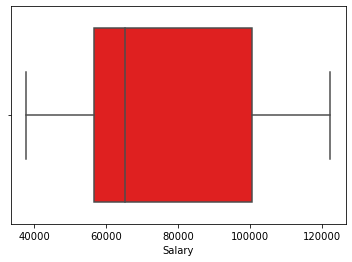

In [4]:
#Checking for outliers
sns.boxplot(x=salary_data.Salary, color='red');

<AxesSubplot:xlabel='YearsExperience'>

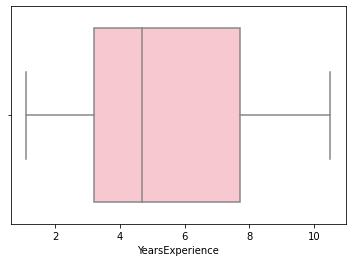

In [5]:
sns.boxplot(x=salary_data.YearsExperience,color='pink')
#No outliers detected

<AxesSubplot:>

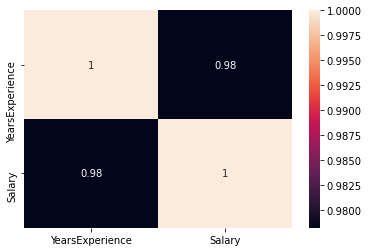

In [6]:
#Finding correlation using Heatmap
sns.heatmap(salary_data[['YearsExperience','Salary']].corr(),annot=True)
#We're having a good positive correlation of 0.98 between the variables

### Building the model

In [7]:
#Identifying Feature x and Target y and Initializing the Model
Regression_Model=sm.ols('Salary~YearsExperience',data=salary_data).fit()

In [8]:
#Calculating coefficient parameters
print(Regression_Model.params)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


In [9]:
#Calculating t-values & p-values
print(Regression_Model.tvalues,'\n',Regression_Model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [10]:
print('r-squared value: ',Regression_Model.rsquared,'r-squared adjusted value: ',Regression_Model.rsquared_adj)

r-squared value:  0.9569566641435086 r-squared adjusted value:  0.9554194021486339


### Testing the model

In [12]:
#Making prediction using given data
salary_pred = Regression_Model.predict()
#Comparing Actual and Predicted salary
salary_act = pd.DataFrame(salary_data.Salary)
salary_pred = pd.DataFrame(Regression_Model.predict(), columns = ['Predicted Salary'])
pd.concat([salary_act, salary_pred], axis = 1)

,Salary,Predicted Salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


Text(0, 0.5, 'Salary')

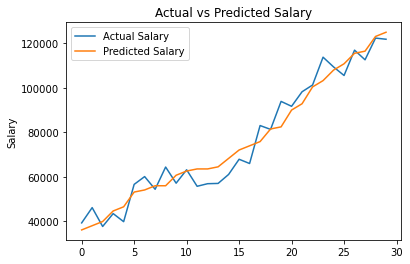

In [13]:
#Plotting graph of actual salary vs predicted salary
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(salary_act)
plt.plot(salary_pred)
plt.legend(['Actual Salary','Predicted Salary'])
plt.title("Actual vs Predicted Salary")
plt.ylabel("Salary")

### Predicting Salary using Model!

In [14]:
## r-squared value is greater than 0.95 hence model can be used for prediction!
x = (int(input("Enter experience in years : ")))
np.asarray(x)
x = pd.DataFrame([x], columns = ['YearsExperience'])
print('The expected salary is: ', Regression_Model.predict(x))

Enter experience in years : 2
The expected salary is:  0    44692.124842
dtype: float64
